In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
ticker = "AAPL"
start_date = "2015-01-01"
end_date = "2023-09-01"

stock_data = yf.download(ticker, start=start_date, end=end_date)

print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.373960  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  23.687307  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  23.689543  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.021719  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  24.944689  237458000


In [8]:
print(stock_data.info())

missing_values = stock_data.isnull().sum()
print("Missing values:\n", missing_values)

stock_data = stock_data.fillna(method='ffill')

print("Missing values after filling:\n", stock_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2181 entries, 2015-01-02 to 2023-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2181 non-null   float64
 1   High       2181 non-null   float64
 2   Low        2181 non-null   float64
 3   Close      2181 non-null   float64
 4   Adj Close  2181 non-null   float64
 5   Volume     2181 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 119.3 KB
None
Missing values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values after filling:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


C:\Users\sudar\AppData\Local\Temp\ipykernel_9272\946878203.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data = stock_data.fillna(method='ffill')


In [9]:
# Calculate Moving Averages
stock_data['MA20'] = np.round(stock_data['Close'].rolling(window=20).mean(), 2)
stock_data['MA50'] = np.round(stock_data['Close'].rolling(window=50).mean(), 2)

# Calculate Exponential Moving Average
stock_data['EMA20'] = np.round(stock_data['Close'].ewm(span=20, adjust=False).mean(), 2)

# Calculate Relative Strength Index (RSI)
delta = stock_data['Close'].diff(1).values 
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

# Calculate the average gain and loss
average_gain = pd.Series(gain).rolling(window=14).mean().values
average_loss = pd.Series(loss).rolling(window=14).mean().values

# Calculate RSI
rs = average_gain / average_loss
rsi = 100 - (100 / (1 + rs))
stock_data['RSI'] = np.round(rsi, 2)

# Calculate Moving Average Convergence Divergence (MACD)
ema12 = stock_data['Close'].ewm(span=12, adjust=False).mean().values
ema26 = stock_data['Close'].ewm(span=26, adjust=False).mean().values
macd = ema12 - ema26
stock_data['MACD'] = np.round(macd, 2)

# Display the first few rows of the modified data
print(stock_data.head())


                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.373960  212818400   
2015-01-05  27.072500  27.162500  26.352501  26.562500  23.687307  257142000   
2015-01-06  26.635000  26.857500  26.157499  26.565001  23.689543  263188400   
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.021719  160423600   
2015-01-08  27.307501  28.037500  27.174999  27.972500  24.944689  237458000   

            MA20  MA50  EMA20  RSI  MACD  
Date                                      
2015-01-02   NaN   NaN  27.33  NaN  0.00  
2015-01-05   NaN   NaN  27.26  NaN -0.06  
2015-01-06   NaN   NaN  27.19  NaN -0.11  
2015-01-07   NaN   NaN  27.17  NaN -0.11  
2015-01-08   NaN   NaN  27.25  NaN -0.04  


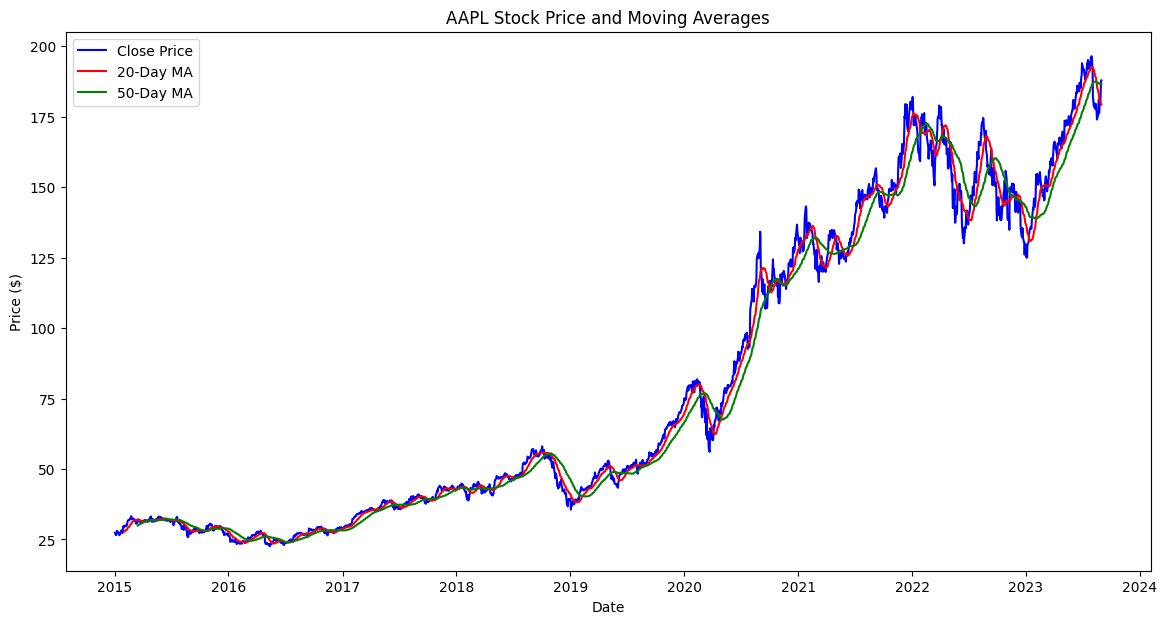

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data.index, stock_data['MA20'], label='20-Day MA', color='red')
plt.plot(stock_data.index, stock_data['MA50'], label='50-Day MA', color='green')
plt.title(f'{ticker} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


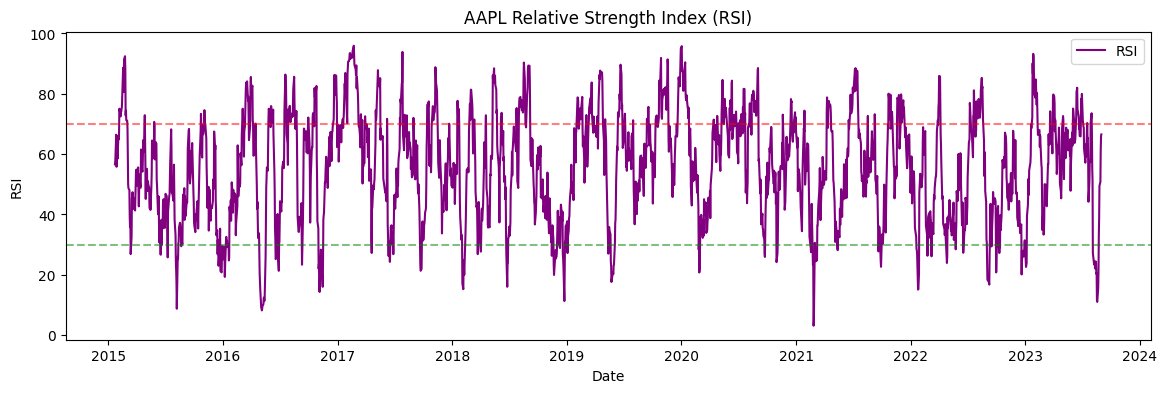

In [11]:
plt.figure(figsize=(14, 4))
plt.plot(stock_data.index, stock_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title(f'{ticker} Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

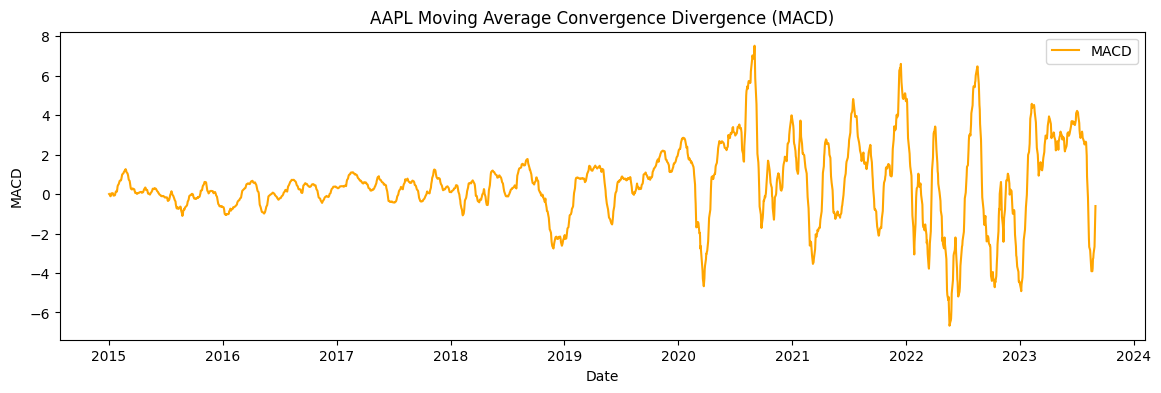

In [12]:
plt.figure(figsize=(14, 4))
plt.plot(stock_data.index, stock_data['MACD'], label='MACD', color='orange')
plt.title(f'{ticker} Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

stock_data_clean = stock_data.dropna()

features = ['MA20', 'MA50', 'EMA20', 'RSI', 'MACD']
X = stock_data_clean[features].values  # NumPy array
y = stock_data_clean['Close'].values  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 1705
Testing samples: 427


In [14]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression MAE: {mae:.2f}")


Linear Regression RMSE: 2.92
Linear Regression MAE: 2.22


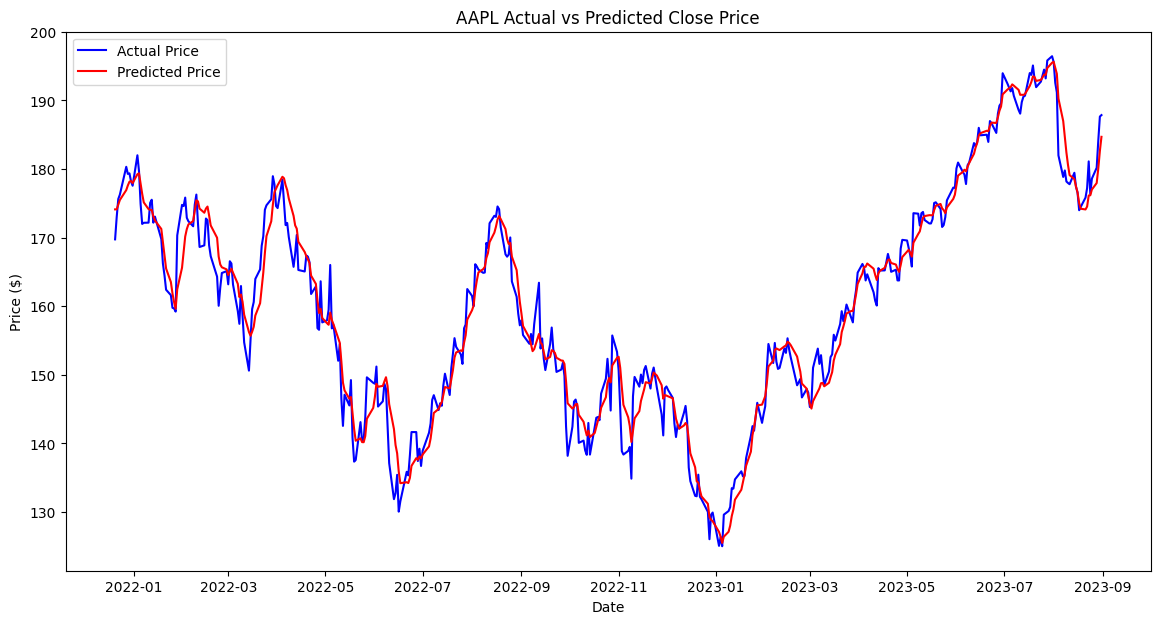

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data_clean.index[-len(y_test):], y_test, label='Actual Price', color='blue')
plt.plot(stock_data_clean.index[-len(y_test):], y_pred, label='Predicted Price', color='red')
plt.title(f'{ticker} Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


C:\Users\sudar\AppData\Local\Temp\ipykernel_9272\1403349790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_clean['Signal'] = 0  # Initialize signal column
C:\Users\sudar\AppData\Local\Temp\ipykernel_9272\1403349790.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

U

Golden Cross Dates:
 DatetimeIndex(['2015-04-28', '2015-10-27', '2016-03-11', '2017-08-02',
               '2017-11-01', '2018-03-08', '2018-05-10', '2018-07-24',
               '2019-02-12', '2019-07-01', '2020-04-30', '2020-11-05',
               '2021-04-19', '2021-06-28', '2021-11-04', '2022-04-05',
               '2022-07-20', '2022-11-23', '2022-12-02', '2023-02-03'],
              dtype='datetime64[ns]', name='Date', freq=None)
Death Cross Dates:
 DatetimeIndex(['2015-06-25', '2015-12-18', '2016-05-05', '2016-07-08',
               '2016-11-15', '2017-06-27', '2017-10-02', '2018-04-13',
               '2018-07-11', '2018-10-29', '2019-05-24', '2020-03-05',
               '2020-10-02', '2021-02-26', '2021-05-26', '2021-10-01',
               '2022-01-31', '2022-05-03', '2022-09-19', '2022-11-28',
               '2022-12-19', '2023-08-16'],
              dtype='datetime64[ns]', name='Date', freq=None)


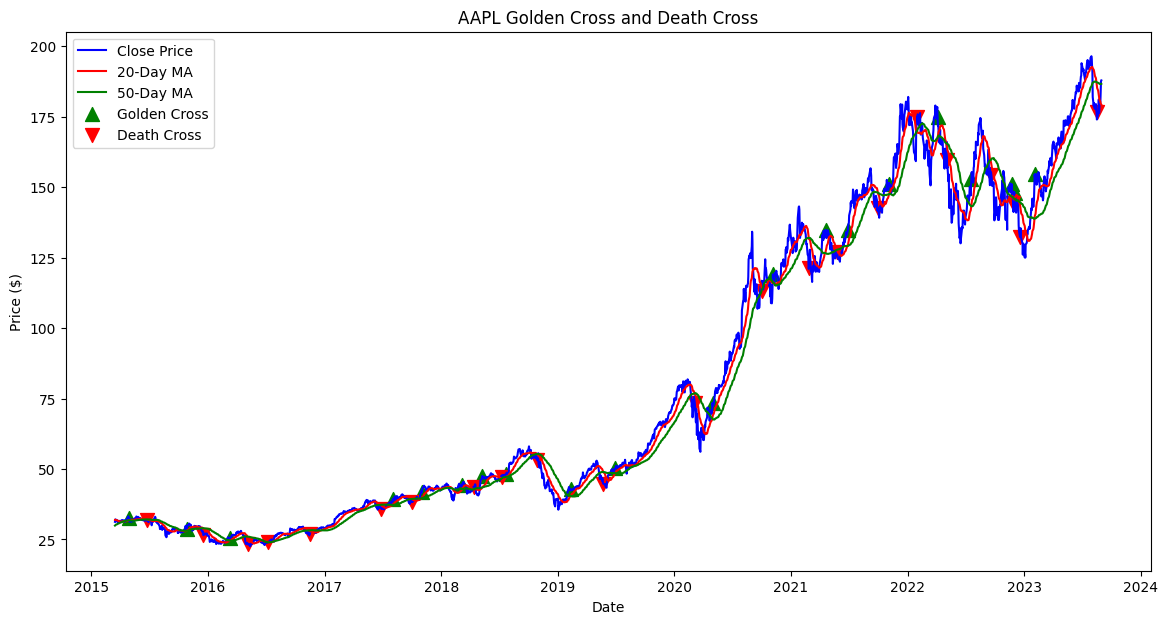

In [16]:
# Identify Golden Cross and Death Cross 
stock_data_clean['Signal'] = 0  # Initialize signal column

# Golden Cross: MA20 crosses above MA50
stock_data_clean['Signal'][stock_data_clean['MA20'] > stock_data_clean['MA50']] = 1

# Death Cross: MA20 crosses below MA50
stock_data_clean['Signal'][stock_data_clean['MA20'] < stock_data_clean['MA50']] = -1

# Find cross points
stock_data_clean['Cross'] = stock_data_clean['Signal'].diff()

# Golden Cross
golden_cross = stock_data_clean[stock_data_clean['Cross'] == 2]
print("Golden Cross Dates:\n", golden_cross.index)

# Death Cross
death_cross = stock_data_clean[stock_data_clean['Cross'] == -2]
print("Death Cross Dates:\n", death_cross.index)

# Plot Golden Cross and Death Cross
plt.figure(figsize=(14, 7))
plt.plot(stock_data_clean.index, stock_data_clean['Close'], label='Close Price', color='blue')
plt.plot(stock_data_clean.index, stock_data_clean['MA20'], label='20-Day MA', color='red')
plt.plot(stock_data_clean.index, stock_data_clean['MA50'], label='50-Day MA', color='green')

# Plot Golden Cross
plt.scatter(golden_cross.index, golden_cross['Close'], marker='^', color='g', label='Golden Cross', s=100)

# Plot Death Cross
plt.scatter(death_cross.index, death_cross['Close'], marker='v', color='r', label='Death Cross', s=100)

plt.title(f'{ticker} Golden Cross and Death Cross')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [17]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


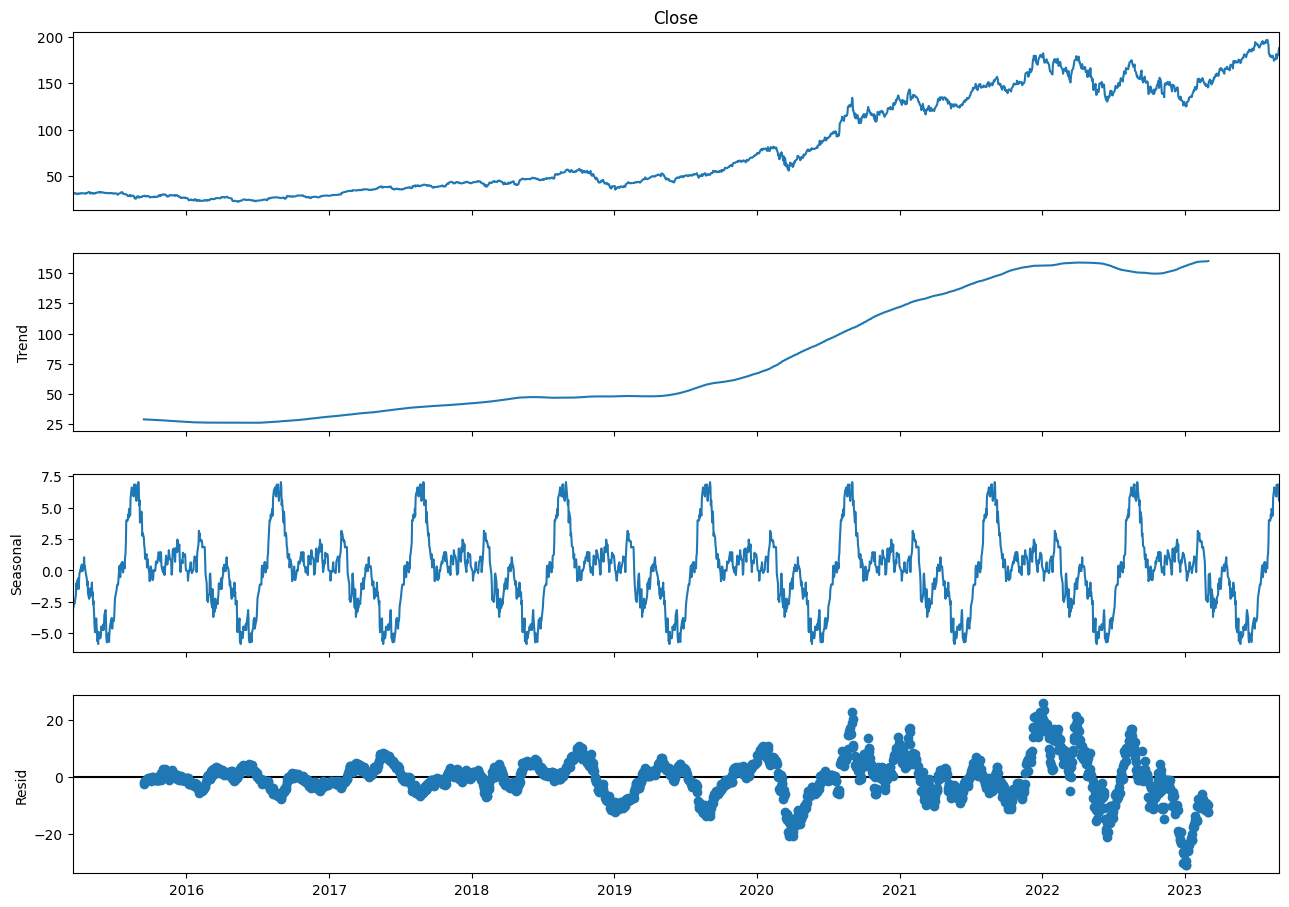

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(stock_data_clean['Close'], model='additive', period=252)  # Approx. trading days in a year

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()


In [19]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Use only the 'Close' price for LSTM
close_prices = stock_data_clean[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices)

# Define the number of time steps
time_steps = 60

# Create sequences
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_close, time_steps)

# Reshape X for LSTM [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and testing sets (80-20 split)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 1657
Testing samples: 415


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50


c:\Users\sudar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0136 - val_loss: 0.0011
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011 - val_loss: 7.5557e-04
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8.5239e-04 - val_loss: 7.3639e-04
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.7076e-04 - val_loss: 0.0015
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.4278e-04 - val_loss: 8.8755e-04
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.8570e-04 - val_loss: 0.0020
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.2019e-04 - val_loss: 7.7293e-04
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.7441e-04 - val_loss: 7.3368e-04
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.0725e-04 - val_loss: 0.0054
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.9657e-04 - val_loss: 5.3448e-04
Epoch 12/50
47/47 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
LSTM RMSE: 5.17
LSTM MAE: 4.29


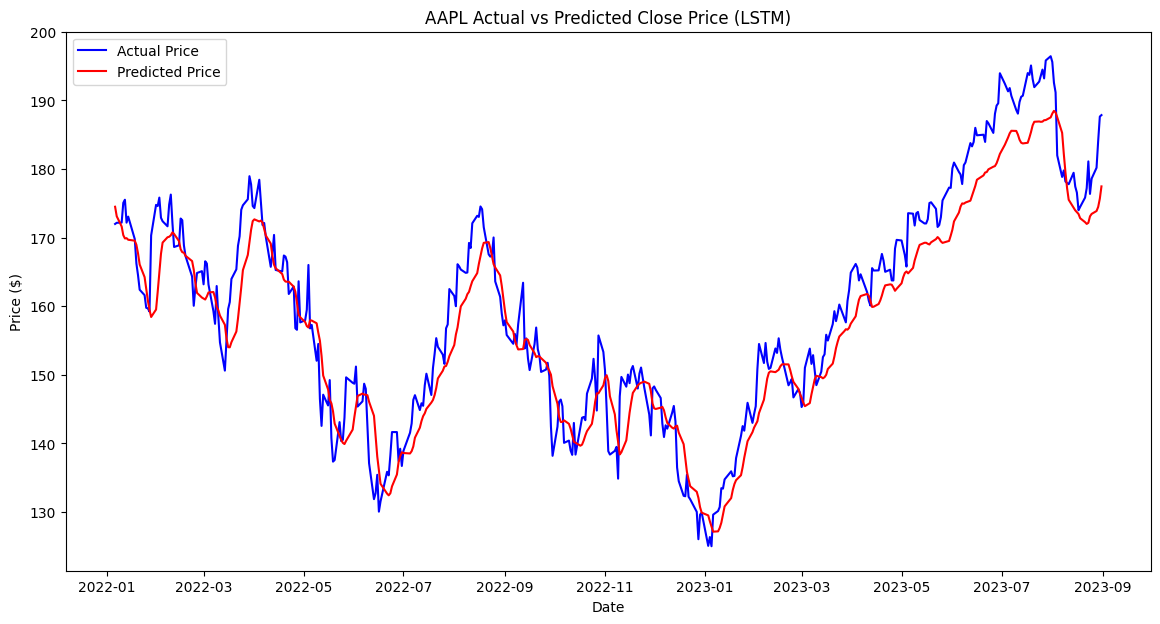

In [21]:
# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics using NumPy
rmse_lstm = np.sqrt(np.mean((predicted_prices - real_prices) ** 2))
mae_lstm = np.mean(np.abs(predicted_prices - real_prices))

print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"LSTM MAE: {mae_lstm:.2f}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(stock_data_clean.index[-len(real_prices):], real_prices, label='Actual Price', color='blue')
plt.plot(stock_data_clean.index[-len(predicted_prices):], predicted_prices, label='Predicted Price', color='red')
plt.title(f'{ticker} Actual vs Predicted Close Price (LSTM)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you have these features in your DataFrame:
features = ['MA20', 'MA50', 'EMA20', 'RSI', 'MACD']

# Drop rows with NaN values resulting from moving averages and RSI calculations
stock_data_clean = stock_data.dropna()

# Define features (X) and target (y)
X = stock_data_clean[features].values  # Features
y = stock_data_clean['Close'].values  # Target variable (close price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 1705
Testing samples: 427


In [23]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)


In [24]:
# Create a new column for predicted close prices
stock_data_clean['Predicted_Close'] = np.nan  # Initialize with NaNs

# Assign predictions to the corresponding rows in the DataFrame
stock_data_clean['Predicted_Close'].iloc[-len(y_pred):] = y_pred

# Check the DataFrame to ensure predictions are stored correctly
print(stock_data_clean[['Close', 'Predicted_Close']].tail())


                 Close  Predicted_Close
Date                                   
2023-08-25  178.610001       177.022372
2023-08-28  180.190002       177.958606
2023-08-29  184.119995       180.064441
2023-08-30  187.649994       182.624651
2023-08-31  187.869995       184.700834


C:\Users\sudar\AppData\Local\Temp\ipykernel_9272\3318086006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_clean['Predicted_Close'] = np.nan  # Initialize with NaNs
C:\Users\sudar\AppData\Local\Temp\ipykernel_9272\3318086006.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] 

In [25]:
# Define thresholds for generating trading signals
buy_threshold = 0.01  # 1% above the current price
sell_threshold = -0.01  # 1% below the current price

# Initialize 'Position' column
stock_data_clean['Position'] = 0  # No position by default

# Generate 'Position' based on the predicted close price
stock_data_clean['Position'] = np.where(
    stock_data_clean['Predicted_Close'] > stock_data_clean['Close'] * (1 + buy_threshold), 1, stock_data_clean['Position']
)
stock_data_clean['Position'] = np.where(
    stock_data_clean['Predicted_Close'] < stock_data_clean['Close'] * (1 + sell_threshold), -1, stock_data_clean['Position']
)

# Check if 'Position' column is created properly
print(stock_data_clean[['Close', 'Predicted_Close', 'Position']].tail())


                 Close  Predicted_Close  Position
Date                                             
2023-08-25  178.610001       177.022372         0
2023-08-28  180.190002       177.958606        -1
2023-08-29  184.119995       180.064441        -1
2023-08-30  187.649994       182.624651        -1
2023-08-31  187.869995       184.700834        -1


C:\Users\sudar\AppData\Local\Temp\ipykernel_9272\1052573217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_clean['Position'] = 0  # No position by default
C:\Users\sudar\AppData\Local\Temp\ipykernel_9272\1052573217.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_clean['Position'] = np.where(
C:\Users\sudar\AppData\Local\Temp\ipykernel_9272\1052573217.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [26]:
# Calculate daily returns
stock_data_clean['Return'] = stock_data_clean['Close'].pct_change()

# Calculate strategy returns based on the 'Position' column
stock_data_clean['Strategy_Return'] = stock_data_clean['Position'].shift(1) * stock_data_clean['Return']

# Calculate cumulative market return
stock_data_clean['Cumulative_Market_Return'] = (1 + stock_data_clean['Return']).cumprod()

# Calculate cumulative strategy return
stock_data_clean['Cumulative_Strategy_Return'] = (1 + stock_data_clean['Strategy_Return']).cumprod()

# Display the first few rows to ensure calculations are correct
print(stock_data_clean[['Close', 'Predicted_Close', 'Return', 'Strategy_Return', 'Cumulative_Market_Return', 'Cumulative_Strategy_Return']].tail())


                 Close  Predicted_Close    Return  Strategy_Return  \
Date                                                                 
2023-08-25  178.610001       177.022372  0.012643         0.000000   
2023-08-28  180.190002       177.958606  0.008846         0.000000   
2023-08-29  184.119995       180.064441  0.021810        -0.021810   
2023-08-30  187.649994       182.624651  0.019172        -0.019172   
2023-08-31  187.869995       184.700834  0.001172        -0.001172   

            Cumulative_Market_Return  Cumulative_Strategy_Return  
Date                                                              
2023-08-25                  5.717807                    1.035165  
2023-08-28                  5.768388                    1.035165  
2023-08-29                  5.894198                    1.012588  
2023-08-30                  6.007203                    0.993174  
2023-08-31                  6.014246                    0.992010  


C:\Users\sudar\AppData\Local\Temp\ipykernel_9272\1781697321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_clean['Return'] = stock_data_clean['Close'].pct_change()
C:\Users\sudar\AppData\Local\Temp\ipykernel_9272\1781697321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_clean['Strategy_Return'] = stock_data_clean['Position'].shift(1) * stock_data_clean['Return']
C:\Users\sudar\AppData\Local\Temp\ipykernel_9272\1781697321.py:8: SettingWithCopyWarning: 
A value is trying to be 

In [27]:
import numpy as np

stock_data_clean['Signal_Type'] = 'None'

# Golden Cross: MA20 crosses above MA50
golden_cross = (stock_data_clean['MA20'] > stock_data_clean['MA50']) & (stock_data_clean['MA20'].shift(1) <= stock_data_clean['MA50'].shift(1))
stock_data_clean.loc[golden_cross, 'Signal_Type'] = 'Golden Cross'

# Death Cross: MA20 crosses below MA50
death_cross = (stock_data_clean['MA20'] < stock_data_clean['MA50']) & (stock_data_clean['MA20'].shift(1) >= stock_data_clean['MA50'].shift(1))
stock_data_clean.loc[death_cross, 'Signal_Type'] = 'Death Cross'

# Save the updated DataFrame to a new CSV file
stock_data_clean.to_csv("stock_data_with_signals.csv", index=True)


C:\Users\sudar\AppData\Local\Temp\ipykernel_9272\3363278256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_clean['Signal_Type'] = 'None'
